In [5]:
import pandas as pd
import numpy as np

In [7]:
dataset =pd.read_csv("salary.csv")
dataset

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
...,...,...,...,...,...
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K


In [9]:
dataset.shape

(32561, 5)

In [11]:
# Inspect unique values and clean the column
print(dataset['income'].unique())  # Check unique values
dataset['income'] = dataset['income'].str.strip()  # Remove leading/trailing spaces

# Map values and handle NaN
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1})
dataset['income'] = dataset['income'].fillna(-1).astype(int)  # Replace NaN with -1

# Print the first few rows
print(dataset.head())


['<=50K' '>50K']
   age  education.num  capital.gain  hours.per.week  income
0   90              9             0              40       0
1   82              9             0              18       0
2   66             10             0              40       0
3   54              4             0              40       0
4   41             10             0              40       0


## Segregate the dataset

In [14]:
X = dataset.iloc[:,:-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [16]:
Y = dataset.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

## Training the dataset into Train & Test

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

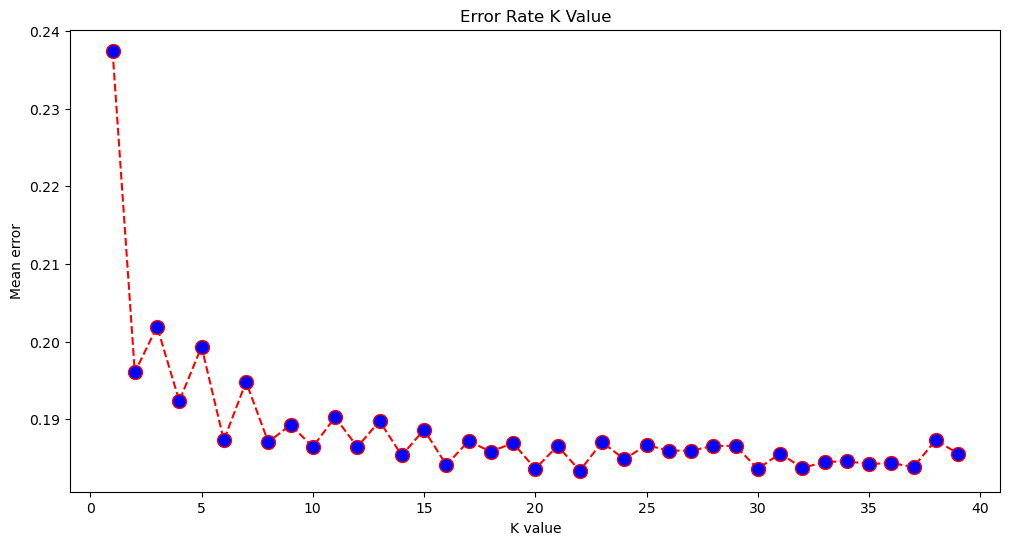

In [26]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#Calculating error for K Values between 1 to 40
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("Error Rate K Value")
plt.xlabel("K value")
plt.ylabel("Mean error")
plt.show()

Upon checking the upper image we can using identified that the K value 16 is least mean error .

## Training 

In [61]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 16,metric ='minkowski',p = 2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

## Predicting whether new employees can get salary more than 50k or less than 50k

In [63]:
age = int(input("Enter the age of Employee's Age :"))
edu = int(input("Enter the education of Employee's  :"))
cg = int(input("Enter the new employee's Captain Gain :"))
wh = int(input("Enter the new employee's Hour 's per week:"))

newEmp = [[age,edu,cg,wh]]
results = model.predict(sc.transform(newEmp))
print(results)
if results ==1:
    print("Yes this Employee might get more than 50k")
else:
    print("This Employee will get less than 50k")


Enter the age of Employee's Age : 25
Enter the education of Employee's  : 11
Enter the new employee's Captain Gain : 2
Enter the new employee's Hour 's per week: 40


[0]
This Employee will get less than 50k


## Prediction on all test data

In [57]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Evaluating Model -- Confusion Matrix

In [59]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix:")
print(cm)

print("Accuracy of the model : {0}%".format(accuracy_score(y_test,y_pred)*100))

Confusion Matrix:
[[5633  560]
 [1063  885]]
Accuracy of the model : 80.06387421692666%
